In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import datetime
from calendar import monthrange
import cartopy.crs as ccrs
import cartopy
import numpy as np

In [3]:
winter_months = {'SH':[4,5,6,7,8,9],
                 'NH':[1,2,3,10,11,12]}

years = np.arange(2000,2022)


output_dict = {}

for hem in ['SH','NH','SH_WEDDELL']:

    d = Dataset(f'../data/ERA5/{hem[:2]}.nc')
    
    lat_grid = np.tile(np.array(d['latitude']),(d['longitude'].shape[0],1)).T

    lon_grid = np.tile(np.array(d['longitude']),(d['latitude'].shape[0],1))

    dt0 = datetime.date(1900,1,1)

    dts = [dt0 + datetime.timedelta(hours=int(d)) for d in d['time']]

    months = np.array([d.month for d in dts])

    years = np.array([d.year for d in dts])

    sic = np.array(d['siconc'])

    sic[sic<0.5] = np.nan

    sic[sic>0.5] = 1

    # https://apps.ecmwf.int/codes/grib/param-db/?id=144
    sf = np.array(d['sf']) #Snowfall in m per day

    sf[np.isnan(sic)] = np.nan
    
    ### Time to do the spatial averaging
    
    monthly_mean_sf = []
    for i in range(sf.shape[0]):
        
        if 'WEDDELL' in hem:
            
            sf[i][lon_grid < -60] = np.nan
            
            sf[i][lon_grid > -15] = np.nan
        
        sf_mon = sf[i][~np.isnan(sf[i])]
        weights_mon = lat_grid[~np.isnan(sf[i])]
        monthly_mean_sf.append(  np.average(sf_mon,weights=weights_mon) )
        
    monthly_mean_sf = np.array(monthly_mean_sf)
        
    monthly_mean_winter = monthly_mean_sf[np.isin(months,winter_months[hem[:2]])]

    monthly_mean_years = years[np.isin(months,winter_months[hem[:2]])]

    cums = []

    for year in years:
        
        month_lengths = np.array([monthrange(year,month)[1] for month in winter_months[hem[:2]]])

        monthly_means_year = monthly_mean_winter[monthly_mean_years==year]
        
        monthly_cumulative = np.multiply(monthly_means_year,month_lengths)

        cums.append( np.sum(monthly_cumulative ))
    
    output_dict[hem] = cums
    
#     break

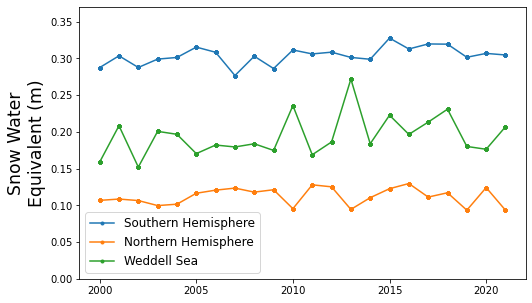

In [26]:
plt.figure(figsize=(8,5))

for key in output_dict.keys():
    
    cums = output_dict[key]
    plt.plot(years,cums,label=labels[key],marker='o',markersize=3)
    

plt.ylim(0,0.37)
plt.legend(fontsize='large')
plt.ylabel('Snow Water\nEquivalent (m)',fontsize='xx-large')

plt.savefig('../figures/snowfall_lineplots.jpg',dpi=400,bbox_inches='tight')

plt.show()

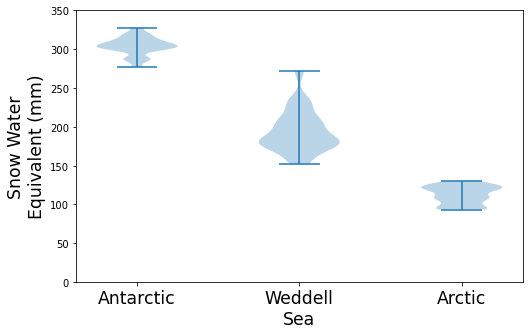

In [31]:
l = []

for key in ['SH','SH_WEDDELL','NH']:
    
    cums = output_dict[key]
    l.append(np.array(cums)*1000)

plt.figure(figsize=(8,5))
    
plt.violinplot(l)

plt.xticks([1,2,3],
           ['Antarctic','Weddell\nSea','Arctic'],
          fontsize='xx-large')
    
plt.yticks(np.arange(0,360,50))
plt.ylabel('Snow Water\nEquivalent (mm)',fontsize='xx-large')

plt.savefig('../figures/snowfall_violins.jpg',dpi=400,bbox_inches='tight')

plt.show()

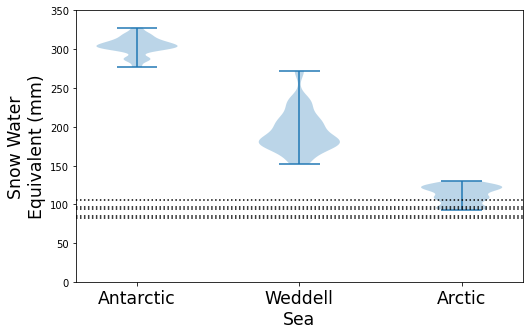

In [32]:
l = []

for key in ['SH','SH_WEDDELL','NH']:
    
    cums = output_dict[key]
    l.append(np.array(cums)*1000)

plt.figure(figsize=(8,5))
    
plt.violinplot(l)

plt.xticks([1,2,3],
           ['Antarctic','Weddell\nSea','Arctic'],
          fontsize='xx-large')
    
plt.yticks(np.arange(0,360,50))
plt.ylabel('Snow Water\nEquivalent (mm)',fontsize='xx-large')

for i in [94.2724004683226,
            96.50669229164663,
            82.95679954647665,
            104.96066547354381,
            84.48352026862618]:
    
    plt.axhline(i,linestyle=':',color='k')

plt.savefig('../figures/snowfall_violins_with_floes.jpg',dpi=400,bbox_inches='tight')

plt.show()

# Below is the code required to download the data for this notebook

In [4]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            'sea_ice_cover', 'snowfall',
        ],
        'year': [
            '2000',
            '2001', '2002', '2003',
            '2004', '2005', '2006',
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014', '2015',
            '2016', '2017', '2018',
            '2019', '2020', '2021',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            -50, -180, -90,
            180,
        ],
    },
    '../data/ERA5/SH.nc')

2023-01-09 19:37:55,511 INFO Welcome to the CDS
2023-01-09 19:37:55,515 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-01-09 19:37:56,077 INFO Request is completed
2023-01-09 19:37:56,078 INFO Downloading https://download-0015-clone.copernicus-climate.eu/cache-compute-0015/cache/data2/adaptor.mars.internal-1673291594.9722352-1271-12-ead49a5c-5b7b-4203-8491-3344cc57b18f.nc to SH.nc (233.5M)


KeyboardInterrupt: 

In [ ]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format': 'netcdf',
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            'sea_ice_cover', 'snowfall',
        ],
        'year': [
            '2000',
            '2001', '2002', '2003',
            '2004', '2005', '2006',
            '2007', '2008', '2009',
            '2010', '2011', '2012',
            '2013', '2014', '2015',
            '2016', '2017', '2018',
            '2019', '2020', '2021',
        ],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
        'time': '00:00',
        'area': [
            90,
            -180,
            50,
            180,
        ],
    },
    '../data/ERA5/NH.nc')